In [1]:
import csv
from enum import Enum
import numpy as np

import project_path
from model.data_accessor import get_data_file_abs_path
from model.connectome_loader import load_connectome_dict_cook, load_connectome_cook, load_gap_connectome_varshney
from model.neuron_metadata import NeuronMetadataCollection

neuron_metadata_collection = NeuronMetadataCollection.load_from_chem_json(get_data_file_abs_path('chem.json'))
conn_spec_to_weight_gap, conn_spec_to_weight_chem = load_connectome_dict_cook()
cook_neurons = set()
for (target, source) in conn_spec_to_weight_gap.keys():
  cook_neurons.add(source)
  cook_neurons.add(target)
for (target, source) in conn_spec_to_weight_chem.keys():
  cook_neurons.add(source)
  cook_neurons.add(target)

# Neuron set differences

In [2]:
# Cook has 448 neurons, Varshney 279
varshney_neurons = neuron_metadata_collection.name_to_id.keys()
print("Cook has %d neurons, Varshney %d" % (len(cook_neurons), len(varshney_neurons)))

# All neurons in varshney found in cook
varshney_diff_cook = varshney_neurons - cook_neurons
print("In varshney, but not in cook: (%d) %s" % (len(varshney_diff_cook), varshney_diff_cook))

  # 169 neurons in cook are not found in varshney.
cook_diff_varshney = cook_neurons - varshney_neurons
print("In cook, but not in varshney: (%d) %s" % (len(cook_diff_varshney), sorted(cook_diff_varshney)))


Cook has 448 neurons, Varshney 279
In varshney, but not in cook: (0) set()
In cook, but not in varshney: (169) ['ANAL', 'DBWML1', 'DBWML10', 'DBWML11', 'DBWML12', 'DBWML13', 'DBWML14', 'DBWML15', 'DBWML16', 'DBWML17', 'DBWML18', 'DBWML19', 'DBWML2', 'DBWML20', 'DBWML21', 'DBWML22', 'DBWML23', 'DBWML24', 'DBWML3', 'DBWML4', 'DBWML5', 'DBWML6', 'DBWML7', 'DBWML8', 'DBWML9', 'DBWMR1', 'DBWMR10', 'DBWMR11', 'DBWMR12', 'DBWMR13', 'DBWMR14', 'DBWMR15', 'DBWMR16', 'DBWMR17', 'DBWMR18', 'DBWMR19', 'DBWMR2', 'DBWMR20', 'DBWMR21', 'DBWMR22', 'DBWMR23', 'DBWMR24', 'DBWMR3', 'DBWMR4', 'DBWMR5', 'DBWMR6', 'DBWMR7', 'DBWMR8', 'DBWMR9', 'HYP', 'I1L', 'I1R', 'I2L', 'I2R', 'I3', 'I4', 'I5', 'I6', 'INTESTINE', 'INTL', 'INTR', 'M1', 'M2L', 'M2R', 'M3L', 'M3R', 'M4', 'M5', 'MC1DL', 'MC1DR', 'MC1V', 'MC2DL', 'MC2DR', 'MC2V', 'MC3DL', 'MC3DR', 'MC3V', 'MCL', 'MCR', 'MI', 'NSML', 'NSMR', 'PM1D', 'PM1VL', 'PM1VR', 'PM2D', 'PM2VL', 'PM2VR', 'PM3D', 'PM3VL', 'PM3VR', 'PM4D', 'PM4VL', 'PM4VR', 'PM5D', 'PM5VL', '

# Gap junction differences

In [3]:
varshney_Gg, varshney_Gs = load_gap_connectome_varshney()
cook_Gg, cook_Gs = load_connectome_cook()

--------------------------
cook Gg has 1276 new connections. Below are some samples.
URADL -> IL2DL
URAVL -> IL2VL
OLLL -> IL2L
URBL -> IL2L
URAVL -> IL2L
--------------------------
cook Gg has lost 256 connections. Below are some samples.
OLLL -> IL1DL
IL1DL -> OLLL
IL1VR -> IL2R
AVAR -> URYVL
IL1DR -> OLLR
--------------------------
cook Gs has 1602 new connections. Below are some samples.
IL2DL -> IL2DL
IL1DL -> IL2DL
CEPDL -> IL2DL
RIH -> IL2VL
IL1L -> IL2L
--------------------------
cook Gs has lost 316 connections. Below are some samples.
OLQVL -> IL2VL
OLQVL -> IL1VL
IL1L -> IL1DL
PVR -> IL1DL
IL1DL -> URYDL


/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


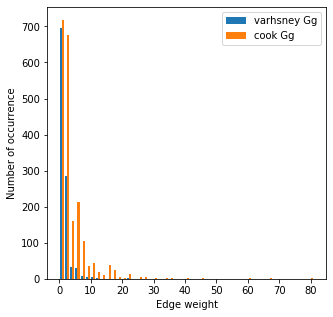

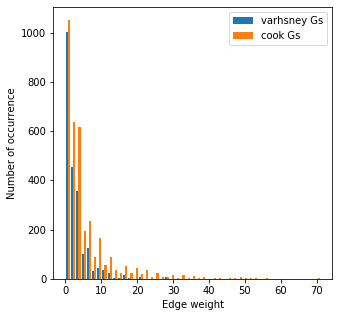

In [12]:
import pylab as plt
N = neuron_metadata_collection.get_size()

def compare_two_matrices(mat1, mat2, mat1name, mat2name):
  diff = mat2 - mat1
  new_conns_in_mat2_bools = np.logical_and(mat2 > 0, mat1 == 0)
  lost_conns_in_mat2_bools = np.logical_and(mat2 == 0, mat1 > 0)
  num_new_conns_in_mat2 = np.sum(new_conns_in_mat2_bools)
  num_lost_conns_in_mat2 = np.sum(lost_conns_in_mat2_bools)
  new_conns_in_mat_2_idxs = np.argwhere(new_conns_in_mat2_bools)
  lost_conns_in_mat_2_idxs = np.argwhere(lost_conns_in_mat2_bools)
  
  num_samples = 5
  # Count number of new connections
  # Confirmation: OLLL to IL2L gap junction
  # exists in https://wormwiring.org/apps/listViewer/?listtype=partners
  # but not in http://wormweb.org/neuralnet#c=OLL&m=1
  print("--------------------------")
  print("%s has %d new connections. Below are some samples." % (mat2name, num_new_conns_in_mat2))
  i = 0
  for (target_id, source_id) in new_conns_in_mat_2_idxs:
    target_neuron = neuron_metadata_collection.get_metadata(target_id).name
    source_neuron = neuron_metadata_collection.get_metadata(source_id).name
    print("%s -> %s" % (source_neuron, target_neuron))
    i += 1
    if i >= num_samples:
      break

  # Count number of missing connections.
  # Confirmation: OLLL to IL1DL gap junction
  # exists in  http://wormweb.org/neuralnet#c=OLL&m=1
  # but not in https://wormwiring.org/apps/listViewer/?listtype=partners
  print("--------------------------")
  print("%s has lost %d connections. Below are some samples." % (mat2name, num_lost_conns_in_mat2))
  i = 0
  for (target_id, source_id) in lost_conns_in_mat_2_idxs:
    target_neuron = neuron_metadata_collection.get_metadata(target_id).name
    source_neuron = neuron_metadata_collection.get_metadata(source_id).name
    print("%s -> %s" % (source_neuron, target_neuron))
    i += 1
    if i >= num_samples:
      break
      
  # Plot edge weight distribution histograms
  fig, ax = plt.subplots(figsize = (5,5))
  vals1 = mat1.flatten()
  # Ignore the absent edges
  vals1 = vals1[vals1>0]
  vals2 = mat2.flatten()
  # Ignore the absent edges
  vals2 = vals2[vals2>0]
  bins = np.linspace(0, max(np.max(vals1), np.max(vals2)), 50)
  ax.hist([vals1, vals2], bins, label=[mat1name, mat2name])
  ax.legend(loc='upper right')
  ax.set_xlabel("Edge weight")
  ax.set_ylabel("Number of occurrence")
  fig.show()
    
compare_two_matrices(varshney_Gg, cook_Gg, "varhsney Gg", "cook Gg")
compare_two_matrices(varshney_Gs, cook_Gs, "varhsney Gs", "cook Gs")

_ = _